<a href="https://colab.research.google.com/github/vchellapilla/Capstone3/blob/main/C3_PreProcessingandTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 3: Pre-Processing and Development

# Imports

Import packages.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import scipy.stats as stats
import sklearn as sk

Import dataset.

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls -l /content/drive/MyDrive/Colab\ Notebooks/Capstone\ 3/df_eda2.csv

-rw------- 1 root root 7053627379 Sep 19 06:51 '/content/drive/MyDrive/Colab Notebooks/Capstone 3/df_eda2.csv'


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Capstone 3/df_eda2.csv'
df = pd.read_csv(path, lineterminator='\n')

# Initial Look at Dataset

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Unnamed: 0,movie_id,user_rating_for_movie,user_id,user_display_name,u_num_ratings_pages,u_num_reviews,genres,image_url,imdb_id,imdb_link,movie_title,original_language,movie_overview,movie_popularity,production_countries,days_since_movie_release,runtime,spoken_languages,tmdb_id,tmdb_link,avg_votes_for_movie,vote_count_for_movie,year_released
0,0,feast-2014,7,deathproof,Lucy,32.0,1650.0,"[""Animation"",""Comedy"",""Drama"",""Family""]",film-poster/2/2/0/1/9/2/220192-feast-0-230-0-3...,tt3689498,http://www.imdb.com/title/tt3689498/maindetails,Feast,en,This Oscar-winning animated short film tells t...,9.260,"[""United States of America""]",2879.0,6.0,"[""English""]",293299.0,https://www.themoviedb.org/movie/293299/,7.9,720.0,2014-01-01
1,1,loving-2016,7,deathproof,Lucy,32.0,1650.0,"[""Romance"",""Drama""]",sm/upload/yp/k3/5v/2p/wzi191DNSs08gDQHHUxYwlxC...,tt4669986,http://www.imdb.com/title/tt4669986/maindetails,Loving,en,"The story of Richard and Mildred Loving, an in...",18.024,"[""United Kingdom"",""United States of America""]",2138.0,123.0,"[""English""]",339419.0,https://www.themoviedb.org/movie/339419/,6.7,759.0,2016-01-01
2,2,scripted-content,7,deathproof,Lucy,32.0,1650.0,"[""Comedy""]",film-poster/2/7/2/9/1/1/272911-scripted-conten...,tt4073494,http://www.imdb.com/title/tt4073494/maindetails,Scripted Content,en,A very short film for Vogue starring Jessica C...,1.400,"[""United States of America""]",3025.0,2.0,[],342914.0,https://www.themoviedb.org/movie/342914/,6.8,5.0,2014-01-01
3,3,the-future,4,deathproof,Lucy,32.0,1650.0,"[""Drama"",""Fantasy"",""Romance""]",film-poster/1/1/4/3/2/11432-the-future-0-230-0...,tt1235170,http://www.imdb.com/title/tt1235170/maindetails,The Future,en,When a couple decides to adopt a stray cat the...,5.208,"[""Germany"",""United States of America"",""France""...",4063.0,91.0,"[""English""]",54662.0,https://www.themoviedb.org/movie/54662/,6.0,60.0,2011-01-01
4,4,mank,5,deathproof,Lucy,32.0,1650.0,"[""Drama"",""History""]",film-poster/5/4/1/4/2/5/541425-mank-0-230-0-34...,tt10618286,http://www.imdb.com/title/tt10618286/maindetails,Mank,en,1930s Hollywood is reevaluated through the eye...,16.331,"[""United States of America""]",668.0,132.0,"[""English""]",614560.0,https://www.themoviedb.org/movie/614560/,6.9,1077.0,2020-01-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689766 entries, 0 to 10689765
Data columns (total 24 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                int64  
 1   movie_id                  object 
 2   user_rating_for_movie     int64  
 3   user_id                   object 
 4   user_display_name         object 
 5   u_num_ratings_pages       float64
 6   u_num_reviews             float64
 7   genres                    object 
 8   image_url                 object 
 9   imdb_id                   object 
 10  imdb_link                 object 
 11  movie_title               object 
 12  original_language         object 
 13  movie_overview            object 
 14  movie_popularity          float64
 15  production_countries      object 
 16  days_since_movie_release  float64
 17  runtime                   float64
 18  spoken_languages          object 
 19  tmdb_id                   float64
 20  tmdb_link             

In [8]:
df = df.drop('Unnamed: 0', axis=1)

Look at the data distribution in each column



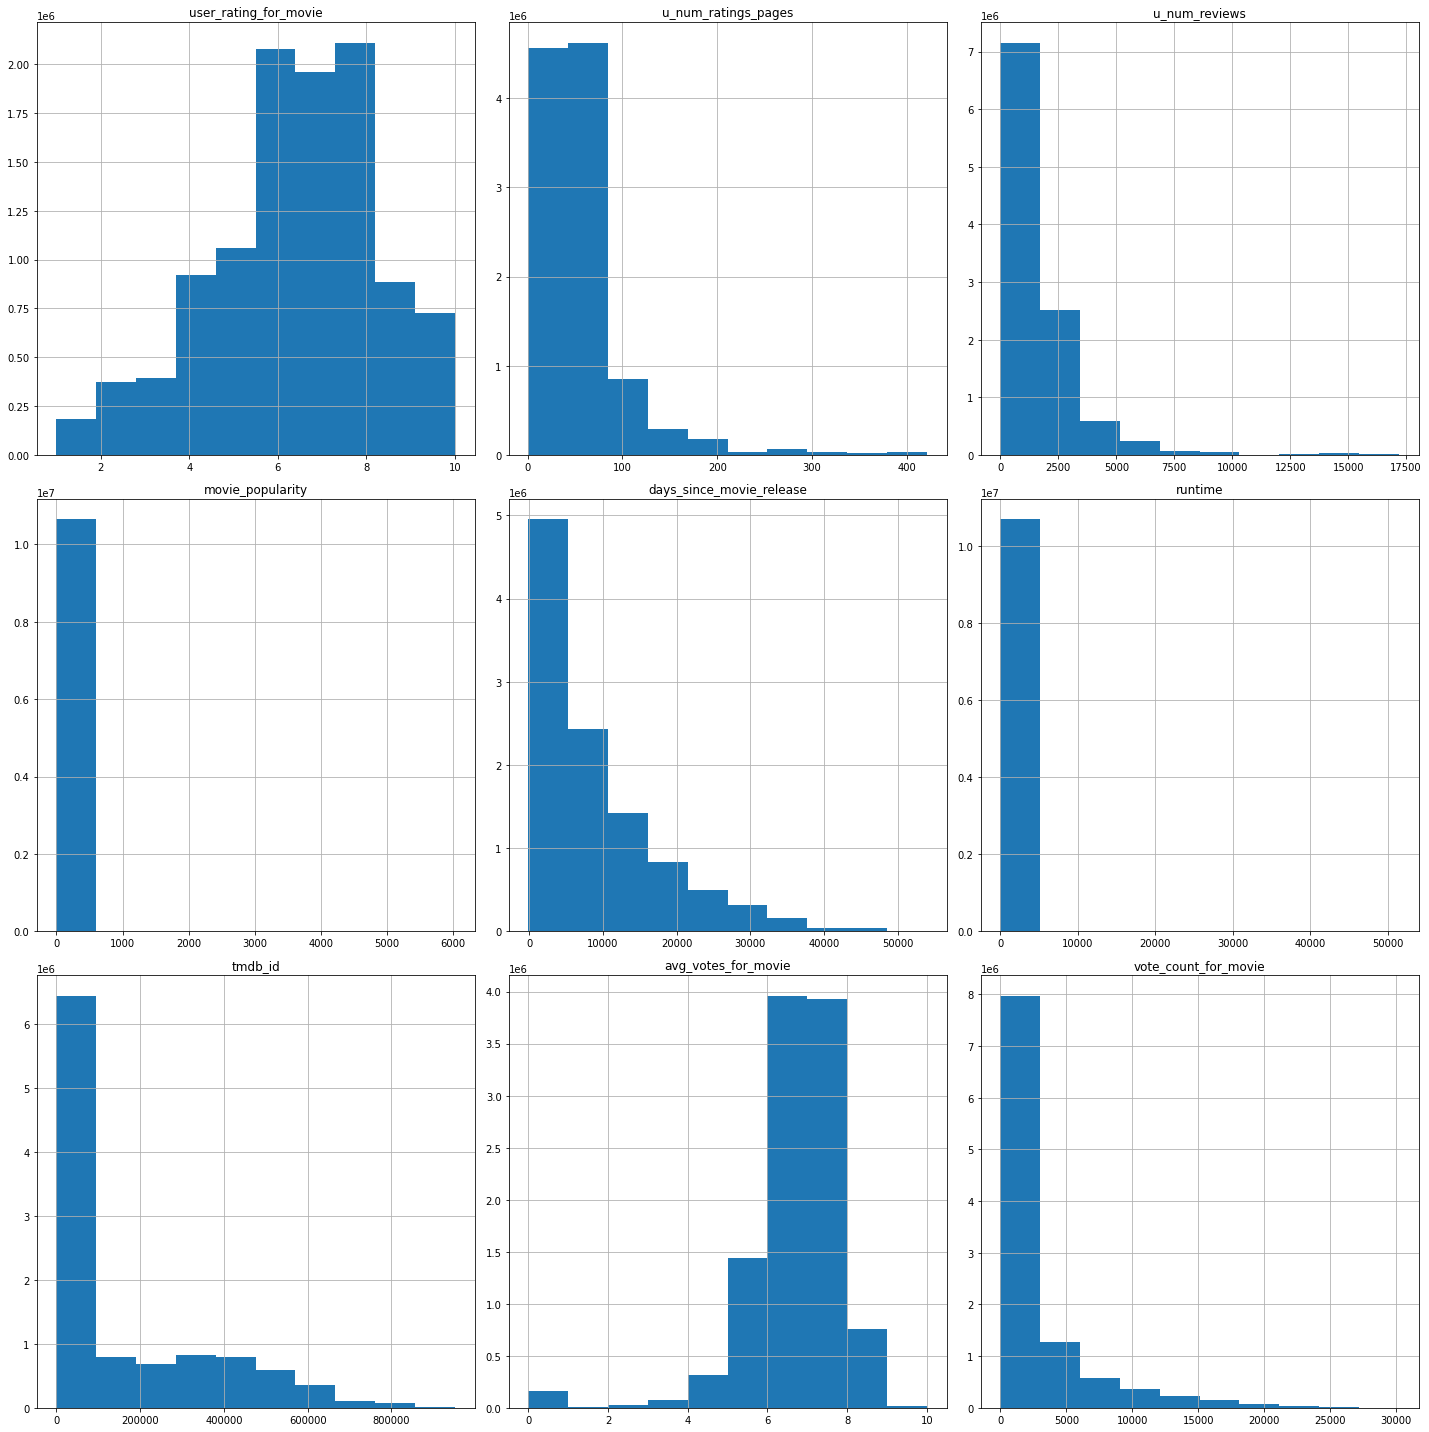

In [9]:
df.hist(figsize=(20,20), bins=10)
plt.tight_layout()

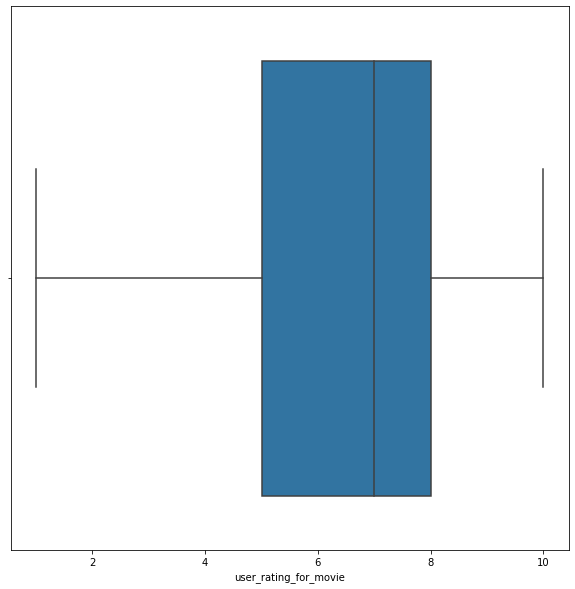

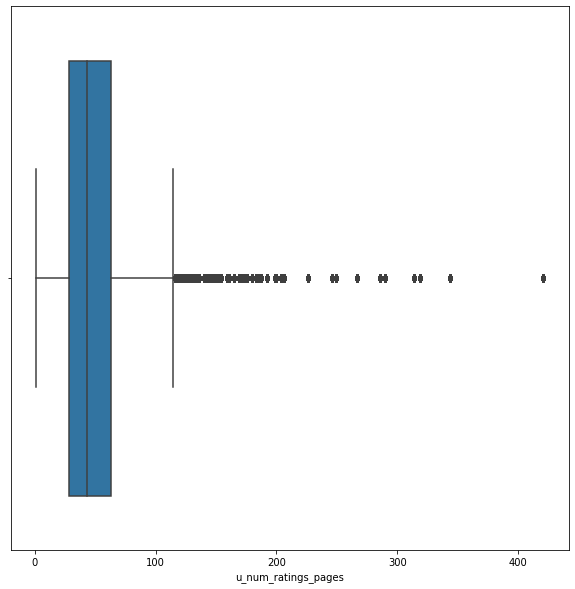

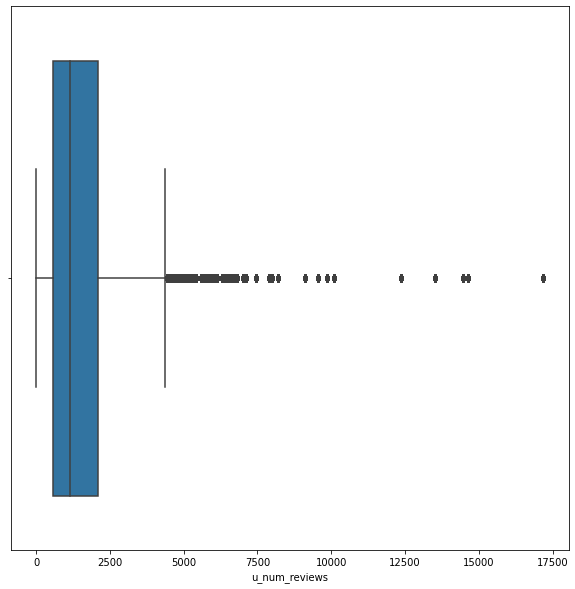

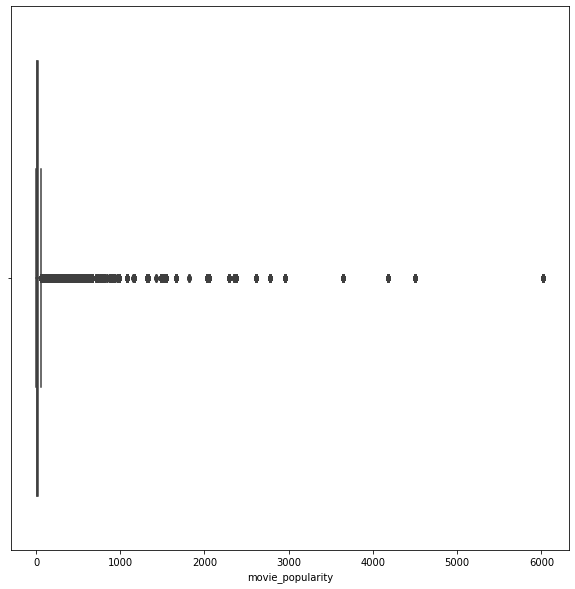

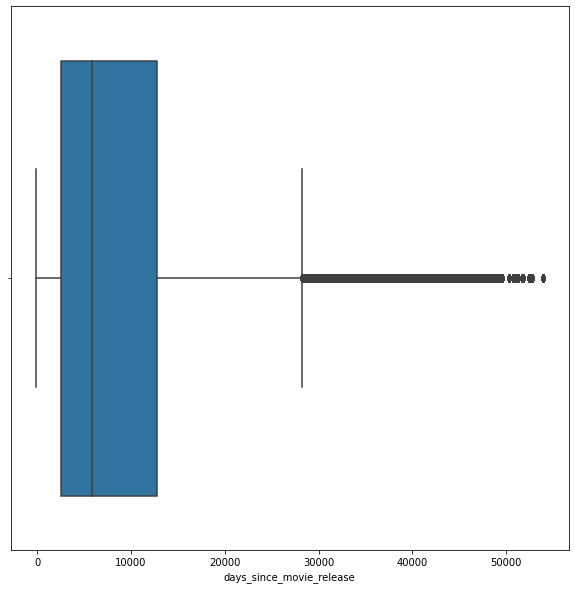

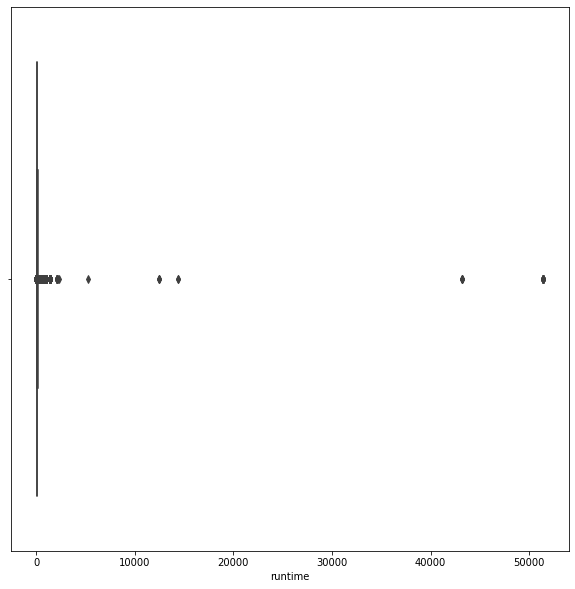

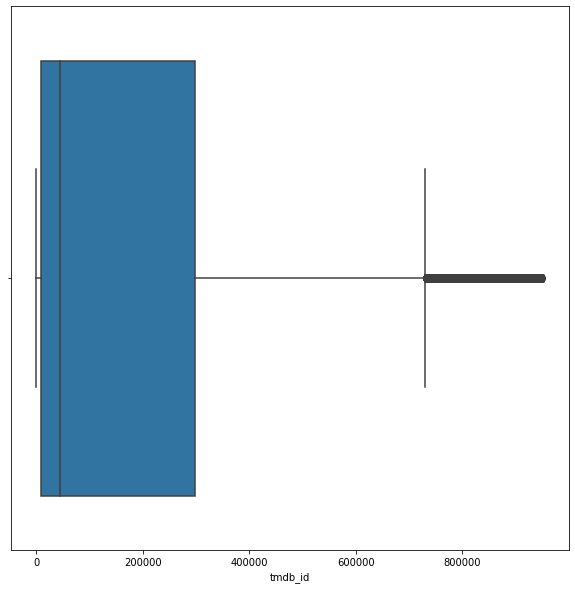

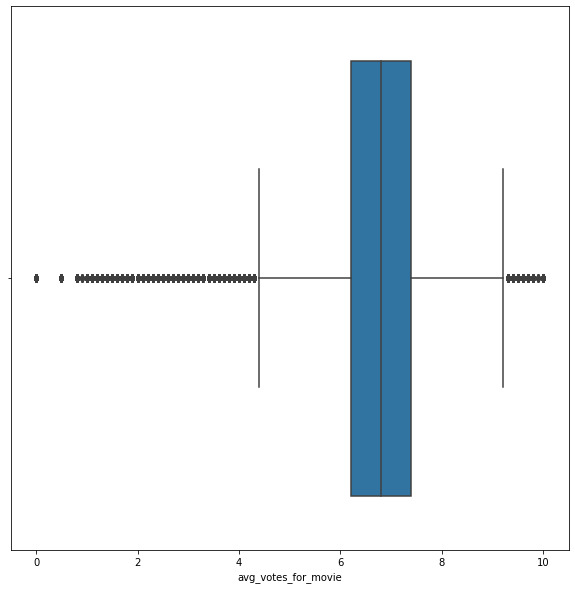

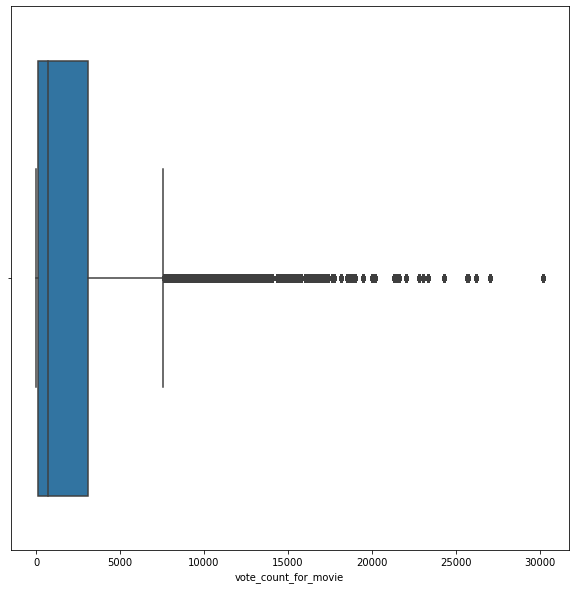

In [10]:
df1=df.select_dtypes(exclude=['object'])

for column in df1:
        plt.figure(figsize=(10,10))
        sns.boxplot(data=df1, x=column)

In [11]:
df.shape

(10689766, 23)

Now, with 10 million rows of data, it is very likely that we will run into memory issues if we proceed to the modeling phase without narrowing down our dataset.

# Missing Values

In [12]:
df.isna().sum()

movie_id                        0
user_rating_for_movie           0
user_id                         0
user_display_name               0
u_num_ratings_pages             0
u_num_reviews                   0
genres                          0
image_url                   16867
imdb_id                         0
imdb_link                       0
movie_title                     0
original_language               0
movie_overview              11891
movie_popularity                0
production_countries            0
days_since_movie_release      242
runtime                         0
spoken_languages                0
tmdb_id                         0
tmdb_link                       0
avg_votes_for_movie             0
vote_count_for_movie            0
year_released                   0
dtype: int64

Let's look at the **days_since_movie_release** column. Since there are only 242 rows with missing values, we can get rid of them.

In [ ]:
df.dropna(subset=df['days_since_movie_release'], inplace=True)

In [14]:
print('Number of Users in Dataset:', len(df.user_id.unique()))
print('Number of Movies in Dataset:', len(df.movie_id.unique()))

Number of Users in Dataset: 7453
Number of Movies in Dataset: 217265


## Distribution of Columns

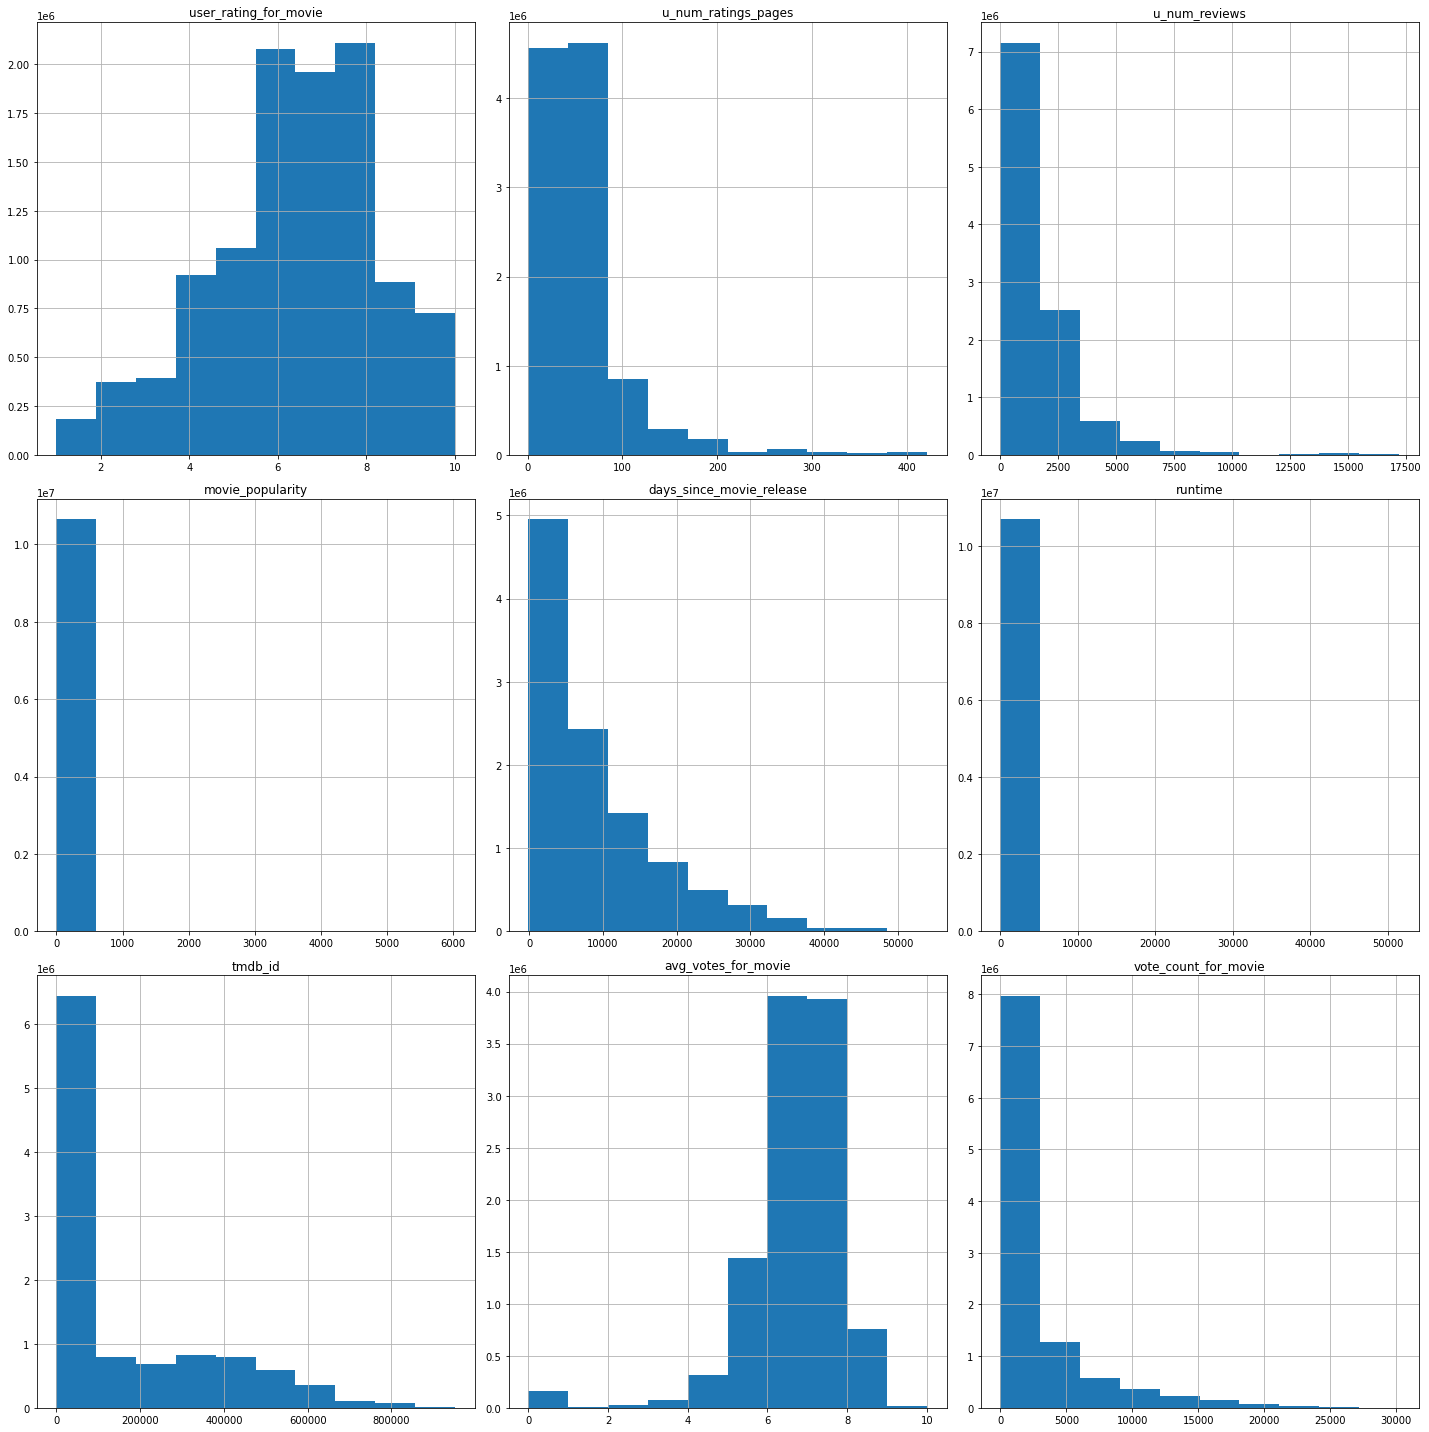

In [15]:
df.hist(figsize=(20,20), bins=10)
plt.tight_layout()

# Categorical Encoding

## *has_image*

Let's convert **image_url** into a boolean column titled **has_image**: If a movie has an image url, it'll be 1, if not, 0.

In [16]:
df['has_image'] = np.where(df.image_url.isna(), 0, 1)

In [17]:
df['has_image'].value_counts()

1    10672899
0       16867
Name: has_image, dtype: int64

In [18]:
#drop image_url
df.drop('image_url', inplace=True, axis=1)

# Removing Certain Rows

Let's filter users that haven't reviewed a significant number of films. 

In [19]:
uniq_users = df.drop_duplicates(subset='user_id')

In [20]:
uniq_users.shape

(7453, 23)

In [21]:
uniq_movies = df.drop_duplicates(subset='movie_id')

In [22]:
uniq_movies.shape

(217265, 23)

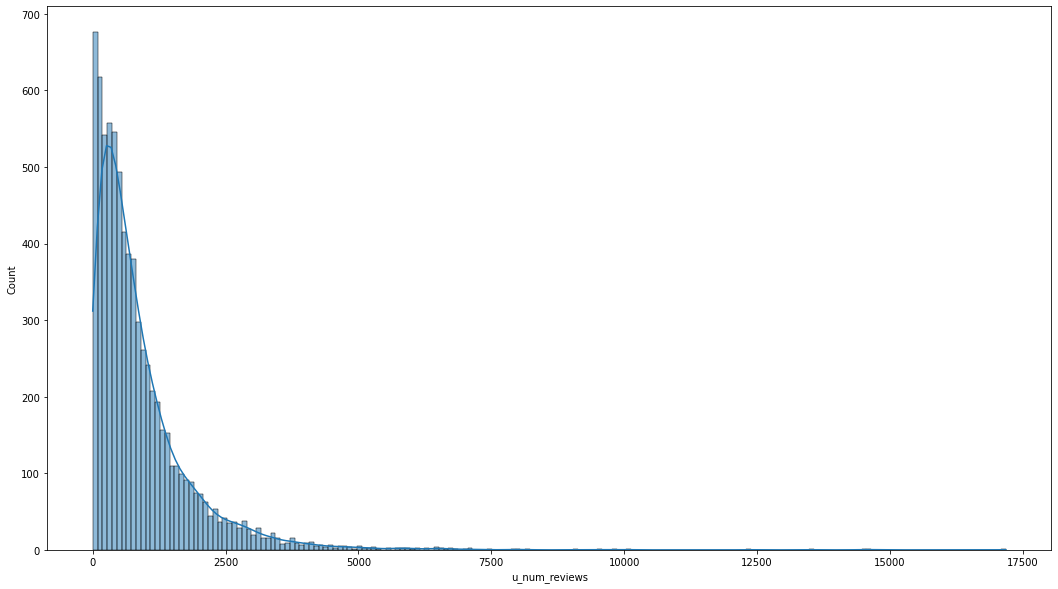

In [23]:
plt.figure(figsize=(18,10))
ax = sns.histplot(x=uniq_users['u_num_reviews'], kde=True)
plt.show()

The distribution of the number of reviews provided by each unique user is skewed to the right.

In [24]:
len(uniq_users[uniq_users['u_num_reviews'] < 50]), len(df[df['u_num_reviews'] < 50])

(388, 116192)

There are 388 unique users with less than 50 reviews. This is 5.2% of the total unique users. Let's remove them from **df**.

In [25]:
df = df[df['u_num_reviews'] > 50]

In [26]:
df.shape

(10568817, 23)

Next, let's look at filtering movies that have been given 0 avergae votes on TMDB database.

In [27]:
len(df[df['avg_votes_for_movie'] == 0])

153564

Let's remove these.

In [28]:
df = df[df['avg_votes_for_movie'] != 0]

Next, let's plot

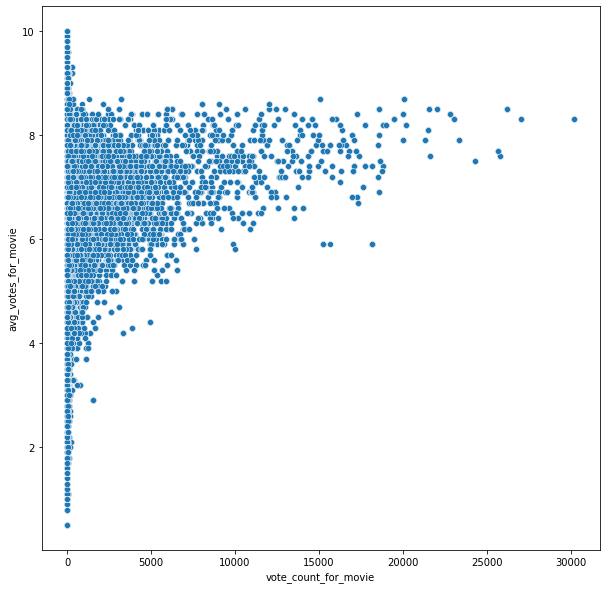

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, y=df['avg_votes_for_movie'], x=df['vote_count_for_movie'])
plt.show()

# Split datasets

In [30]:
#content-based
df1 = pd.DataFrame().assign(
    movie_id = df['movie_id'], 
    movie_title = df['movie_title'],
    movie_overview = df['movie_overview'], 
    genres = df['genres'], 
    production_countries = df['production_countries'],
    spoken_languages = df['spoken_languages'],
    original_language = df['original_language']
    )

In [31]:
#collaborative-based
df2 = pd.DataFrame().assign(
    user_id = df['user_id'],
    user_rating_for_movie = df['user_rating_for_movie'],
    u_num_ratings_pages = df['u_num_ratings_pages'],
    u_num_reviews = df['u_num_reviews'],
    movie_popularity = df['movie_popularity'],
    days_since_movie_release = df['days_since_movie_release'],
    movie_runtime = df['runtime'],
    avg_votes_for_movie = df['avg_votes_for_movie'],
    vote_count_for_movie = df['vote_count_for_movie'],
    has_image = df['has_image']
)

In [32]:
#saving df1
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/Capstone 3/df_ppd1.csv'

with open(path, 'w') as f:
  df1.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
#saving df2
from google.colab import drive

drive.mount('/content/drive')
from google.colab import drive
path = '/content/drive/My Drive/Colab Notebooks/Capstone 3/df_ppd2.csv'

with open(path, 'w') as f:
  df2.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
